# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [79]:
# List for holding lat_lngs and cities
lat_lngs = []
search_cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in search_cities:
        search_cities.append(city)

# Print the city count to confirm sufficient count
len(search_cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [56]:
# Save config information.
units = "metric"
url = (f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q=")

In [132]:
# Set up lists to hold reponse info
city = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
# Counter for records found
record_count = 0
# Counter for processing records
i = 0

print("Beginning Data Retrieval")
print("-----------------------------")

# Loop through the list of cities and perform a request for data on each
for cities in search_cities:
    i = i + 1
    query = url + cities
    response = requests.get(query).json()
    try:
        city.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        record_count = record_count + 1
        print(f"Processing record {i} | {search_cities[i]}")
    except:
        print(f"City not found. Skipping...")
print(f"Data for {record_count} cities has been retrieved.")

Beginning Data Retrieval
-----------------------------
Processing record 1 | tilichiki
Processing record 2 | mahebourg
Processing record 3 | belushya guba
City not found. Skipping...
Processing record 5 | mataura
Processing record 6 | ahipara
Processing record 7 | revelstoke
Processing record 8 | encinitas
Processing record 9 | klaksvik
Processing record 10 | bethel
Processing record 11 | show low
Processing record 12 | plettenberg bay
Processing record 13 | kenai
Processing record 14 | kapaa
Processing record 15 | hermanus
Processing record 16 | bredasdorp
Processing record 17 | biltine
Processing record 18 | cidreira
Processing record 19 | rikitea
Processing record 20 | upernavik
Processing record 21 | sao joao da barra
Processing record 22 | arraial do cabo
Processing record 23 | storforshei
Processing record 24 | tuktoyaktuk
Processing record 25 | cururupu
Processing record 26 | punta arenas
Processing record 27 | georgetown
Processing record 28 | yulara
Processing record 29 | ding

Processing record 249 | hongjiang
Processing record 250 | nemuro
Processing record 251 | husavik
Processing record 252 | sao filipe
Processing record 253 | port lincoln
Processing record 254 | batagay-alyta
Processing record 255 | tiznit
Processing record 256 | san jose
Processing record 257 | bambous virieux
Processing record 258 | ngukurr
City not found. Skipping...
Processing record 260 | alofi
Processing record 261 | vaitupu
City not found. Skipping...
Processing record 263 | sentyabrskiy
City not found. Skipping...
Processing record 265 | balykshi
City not found. Skipping...
Processing record 267 | navahrudak
Processing record 268 | chimoio
Processing record 269 | strezhevoy
Processing record 270 | nepa nagar
Processing record 271 | te anau
Processing record 272 | kathu
Processing record 273 | saint anthony
Processing record 274 | longyearbyen
Processing record 275 | guerrero negro
Processing record 276 | maxixe
Processing record 277 | svetlogorsk
Processing record 278 | suba
Proc

City not found. Skipping...
Processing record 502 | hay river
Processing record 503 | chitral
Processing record 504 | sioux lookout
Processing record 505 | muros
Processing record 506 | falealupo
City not found. Skipping...
Processing record 508 | gamba
Processing record 509 | fare
Processing record 510 | safwah
City not found. Skipping...
Processing record 512 | bauchi
Processing record 513 | mansehra
Processing record 514 | kangaatsiaq
Processing record 515 | blairmore
Processing record 516 | jumla
Processing record 517 | oranjemund
Processing record 518 | limbe
Processing record 519 | khunti
Processing record 520 | stadtallendorf
Processing record 521 | santa vitoria do palmar
Processing record 522 | tyachiv
Processing record 523 | langub
Processing record 524 | iskateley
Processing record 525 | padang
Processing record 526 | manado
Processing record 527 | avera
Processing record 528 | labytnangi
Processing record 529 | mumford
Processing record 530 | valparaiso
Processing record 53

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [139]:
# Create the DataFrame
city_data = {"City": city, "Country": country, "Lat": lat, "Long": lng, "Max Temp": max_temp, 
             "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed, "Date": date
            }
city_df = pd.DataFrame(city_data)

# Save the DataFrame to .csv
city_df.to_csv("..\output_data\cities.csv")

# Show the first 5 lines of the DataFrame
city_df.head()

,City,Country,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Tautira,PF,-17.73,-149.15,26.00,69,20,1.50,1595705189
1,Tilichiki,RU,60.47,166.10,14.53,64,0,2.59,1595705519
2,Mahébourg,MU,-20.41,57.70,20.00,60,75,7.70,1595705531
3,Hilo,US,19.73,-155.09,28.00,65,90,3.10,1595705502
4,Mataura,NZ,-46.19,168.86,6.30,90,100,1.65,1595705459


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [150]:
clean_df = city_df.loc[(city_df["Humidity"] <= 100)]
clean_df
# No cities in the DataFrame have > 100 % humidity

,City,Country,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Tautira,PF,-17.73,-149.15,26.00,69,20,1.50,1595705189
1,Tilichiki,RU,60.47,166.10,14.53,64,0,2.59,1595705519
2,Mahébourg,MU,-20.41,57.70,20.00,60,75,7.70,1595705531
3,Hilo,US,19.73,-155.09,28.00,65,90,3.10,1595705502
4,Mataura,NZ,-46.19,168.86,6.30,90,100,1.65,1595705459
...,...,...,...,...,...,...,...,...,...
550,Salinas,US,36.68,-121.66,22.78,56,1,4.10,1595705652
551,Poum,NC,-20.23,164.02,22.94,80,1,9.05,1595705681
552,Algiers,DZ,36.75,3.04,27.00,74,0,2.10,1595705681
553,Rawson,AR,-43.30,-65.10,13.84,45,0,8.85,1595705537


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

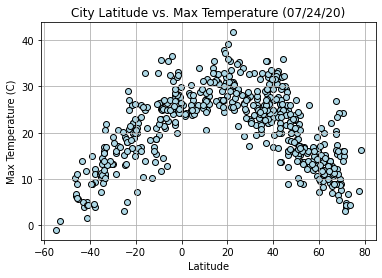

In [182]:
# Define axes
x_latvtemp = list(clean_df["Lat"])
y_latvtemp = list(clean_df["Max Temp"])

# Plot setup
plt.scatter(x_latvtemp, y_latvtemp, color = 'lightblue', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (07/24/20)")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

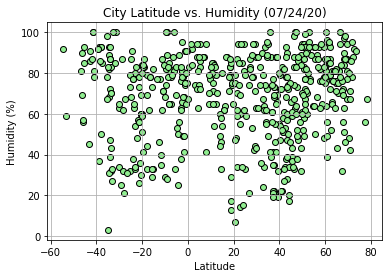

In [183]:
# Define axes
x_latvhumidity = list(clean_df["Lat"])
y_latvhumidity = list(clean_df["Humidity"])

# Plot setup
plt.scatter(x_latvhumidity, y_latvhumidity, color = 'lightgreen', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (07/24/20)")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

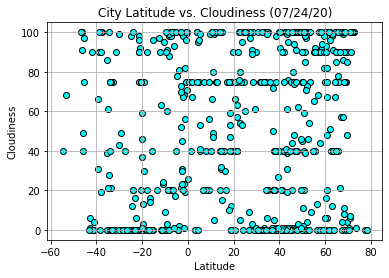

In [184]:
# Define axes
x_latvclouds = list(clean_df["Lat"])
y_latvclouds = list(clean_df["Cloudiness"])

# Plot setup
plt.scatter(x_latvclouds, y_latvclouds, color = 'aqua', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness (07/24/20)")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

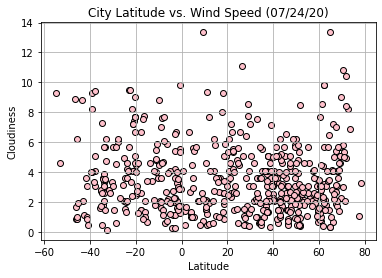

In [185]:
# Define axes
x_latvwind = list(clean_df["Lat"])
y_latvwind = list(clean_df["Wind Speed"])

# Plot setup
plt.scatter(x_latvwind, y_latvwind, color = 'pink', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Wind Speed (07/24/20)")
plt.grid()
plt.show()

## Linear Regression

In [218]:
# Create bins for the data
bins = [-90, 0, 90]
bin_names = ["Southern", "Northern"]
bin_df = clean_df
bin_df["Hemisphere"] = pd.cut(bin_df["Lat"], bins, labels=bin_names, include_lowest=True)
bin_df.head()

,City,Country,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Hemisphere
0,Tautira,PF,-17.73,-149.15,26.00,69,20,1.50,1595705189,Southern
1,Tilichiki,RU,60.47,166.10,14.53,64,0,2.59,1595705519,Northern
2,Mahébourg,MU,-20.41,57.70,20.00,60,75,7.70,1595705531,Southern
3,Hilo,US,19.73,-155.09,28.00,65,90,3.10,1595705502,Northern
4,Mataura,NZ,-46.19,168.86,6.30,90,100,1.65,1595705459,Southern


The r-squared is: 0.8


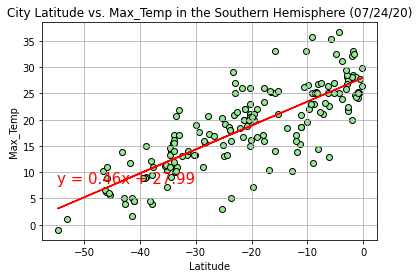

The r-squared is: -0.04


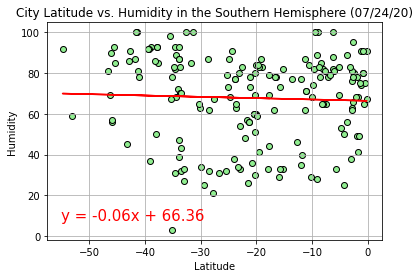

The r-squared is: 0.12


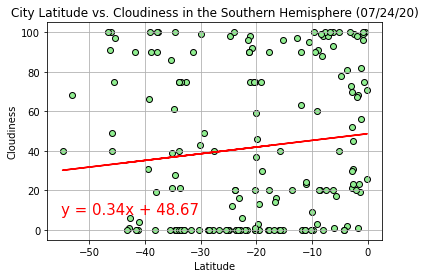

The r-squared is: -0.07


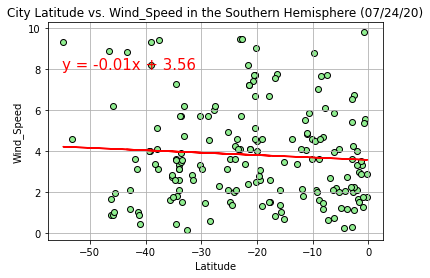

The r-squared is: -0.74


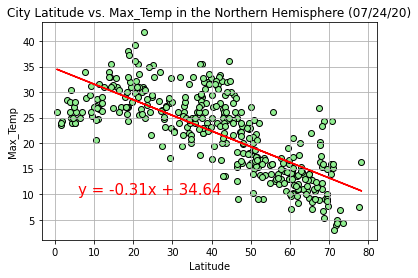

The r-squared is: 0.11


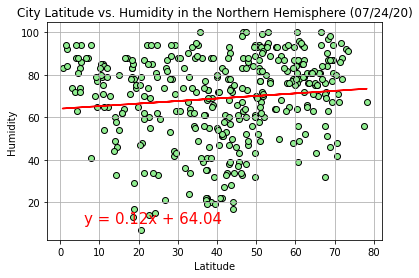

The r-squared is: 0.03


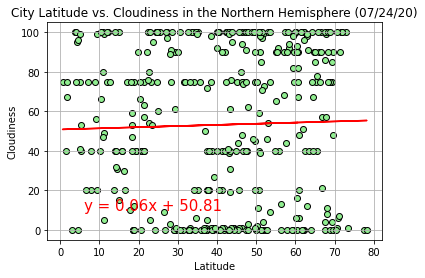

The r-squared is: 0.06


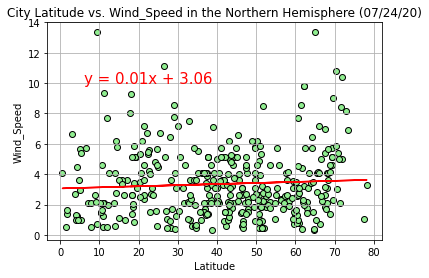

In [237]:
# Create lists to hold y axis data (for plotting)
lat_list = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []

# Create a list of y axis names
y_list = ["Max_Temp", "Humidity", "Cloudiness", "Wind_Speed"]

# Loop to separate data into regions
for bins in bin_names: 

    # Return lat coordinates for a region
    lat_list = bin_df.loc[bin_df["Hemisphere"] == bins,"Lat"]

    # Loop again to get data for each criteria per region
    for y in y_list:
        if y == "Max_Temp":
            temp_list = bin_df.loc[bin_df["Hemisphere"] == bins,"Max Temp"]
        elif y == "Humidity":
            humid_list = bin_df.loc[bin_df["Hemisphere"] == bins,"Humidity"]
        elif y == "Cloudiness":
            cloud_list = bin_df.loc[bin_df["Hemisphere"] == bins,"Cloudiness"]
        elif y == "Wind_Speed":
            wind_list = bin_df.loc[bin_df["Hemisphere"] == bins,"Wind Speed"]
    
    # Now that lists are complete, loop again to create plots
    for y in y_list:
        
        # Define x axis
        x_axis = lat_list
        
        # Define y axis
        if y == "Max_Temp":
            y_axis = temp_list
        elif y == "Humidity":
            y_axis = humid_list
        elif y == "Cloudiness":
            y_axis = cloud_list
        elif y == "Wind_Speed":
            y_axis = wind_list

        # Plot setup
        plt.scatter(x_axis, y_axis, color = 'lightgreen', edgecolors='black')
        plt.xlabel("Latitude")
        plt.ylabel(y)
        plt.title(f"City Latitude vs. {y} in the {bins} Hemisphere (07/24/20)")
        plt.grid()

        # Do linear regression
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
        regress_values = x_axis * slope + intercept
        plt.plot(x_axis, regress_values, "r-")
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        rsq = round(x_axis.corr(y_axis),2)
        if bins == "Southern":
            plt.annotate(line_eq,(-55, 8),fontsize=15,color="red")
        elif bins == "Northern":
            plt.annotate(line_eq,(6, 10),fontsize=15,color="red")
        print(f"The r-squared is: {rsq}")
        plt.savefig(f"..\output_data\{bins}_Hemisphere_{y}.png")
        plt.show()